In [36]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [37]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()


In [38]:
X_train.shape    #3 is rgb channels

(50000, 32, 32, 3)

In [39]:
X_test.shape        # 3 is rgb channels

(10000, 32, 32, 3)

In [40]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [41]:
y_train.shape

(50000, 1)

In [42]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [43]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [44]:
y_test = y_test.reshape(-1,)

In [45]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [46]:
classes[9]

'truck'

In [47]:
classes[6]

'frog'

In [48]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

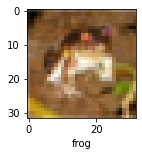

In [49]:
plot_sample(X_train, y_train, 0)


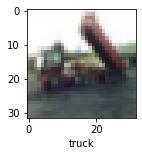

In [50]:
plot_sample(X_train, y_train, 2)

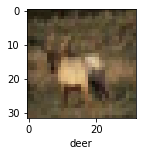

In [51]:
plot_sample(X_train, y_train, 3)

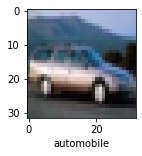

In [52]:
plot_sample(X_train, y_train, 4)

# Here Normalize the training data

In [53]:
X_train = X_train / 255.0
X_test = X_test / 255.0


Available optimizers
SGD,
RMSprop,
Adam,
Adadelta,
Adagrad,
Adamax,
Nadam,
Ftrl

In [54]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8153 - accuracy: 0.3522
Epoch 2/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6235 - accuracy: 0.4258
Epoch 3/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5401 - accuracy: 0.4573
Epoch 4/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4830 - accuracy: 0.4794
Epoch 5/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4313 - accuracy: 0.4966


In [55]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.54      0.59      0.56      1000
           1       0.43      0.79      0.56      1000
           2       0.40      0.34      0.37      1000
           3       0.45      0.16      0.23      1000
           4       0.47      0.34      0.39      1000
           5       0.42      0.33      0.37      1000
           6       0.49      0.61      0.54      1000
           7       0.56      0.53      0.54      1000
           8       0.69      0.47      0.56      1000
           9       0.41      0.61      0.49      1000

    accuracy                           0.48     10000
   macro avg       0.48      0.48      0.46     10000
weighted avg       0.48      0.48      0.46     10000



In [56]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [57]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [58]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4799 - accuracy: 0.4670
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1187 - accuracy: 0.6084
Epoch 3/10
1563/1563 [==============================] - 5s 4ms/step - loss: 0.9859 - accuracy: 0.6568
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9016 - accuracy: 0.6861
Epoch 5/10
1563/1563 [==============================] - 5s 4ms/step - loss: 0.8374 - accuracy: 0.7089
Epoch 6/10
1563/1563 [==============================] - 5s 4ms/step - loss: 0.7816 - accuracy: 0.7267
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7284 - accuracy: 0.7451
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6912 - accuracy: 0.7582
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6524 - accuracy: 0.7710
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.613

In [59]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9275 - accuracy: 0.6996


[0.9274837970733643, 0.6995999813079834]

In [60]:
y_pred = cnn.predict(X_test)
y_pred[:5]


313/313 [==============================] - 1s 2ms/step


array([[1.1177048e-03, 2.3354616e-04, 1.0242570e-03, 6.3635337e-01,
        6.0255959e-05, 2.3452871e-01, 9.0422016e-03, 9.1688762e-06,
        1.1740716e-01, 2.2361070e-04],
       [1.7142263e-03, 2.6930604e-04, 1.5074634e-06, 2.7583023e-06,
        3.6011653e-07, 3.3957768e-08, 9.9788855e-10, 4.8784415e-08,
        9.9797505e-01, 3.6773155e-05],
       [2.1235777e-02, 3.9906059e-03, 2.9138499e-04, 1.2729394e-03,
        7.5509655e-05, 5.8785561e-05, 4.2411461e-06, 1.3352654e-04,
        9.7237182e-01, 5.6545087e-04],
       [9.8164421e-01, 2.4330786e-03, 5.7893782e-04, 3.4991535e-04,
        3.4707610e-04, 6.8933800e-06, 3.2944847e-06, 4.3149419e-05,
        1.4572446e-02, 2.1053167e-05],
       [1.1062011e-06, 5.1242841e-06, 3.1616747e-02, 6.6088654e-02,
        5.0180203e-01, 8.1374962e-03, 3.9232084e-01, 4.5391548e-06,
        2.3369052e-05, 1.4961756e-07]], dtype=float32)

In [61]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]


[3, 8, 8, 0, 4]

In [62]:
y_test[:5]


array([3, 8, 8, 0, 6], dtype=uint8)

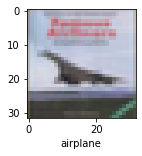

In [63]:
plot_sample(X_test, y_test,3)

In [64]:
classes[y_classes[3]]


'airplane'

In [65]:
classes[y_classes[3]]

'airplane'